In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [98]:
df = pd.read_csv('./Bike-Sharing-Dataset 2/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## <font color='blue'>觀察資料無空值

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [100]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## <font color='blue'>重新命名與刪除資料

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [101]:
del df['instant'] 
del df['dteday']
del df['casual']
del df['cnt']

df.rename(columns={'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'hum':'humidity',
                   'mnth':'month',
                   'hr':'hour',
                   'yr':'year'},inplace=True)
 
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [102]:
print(df.shape)

(17379, 13)


## <font color='blue'>觀察各欄的資料分佈

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1399b2ba8>,
      dtype=object)

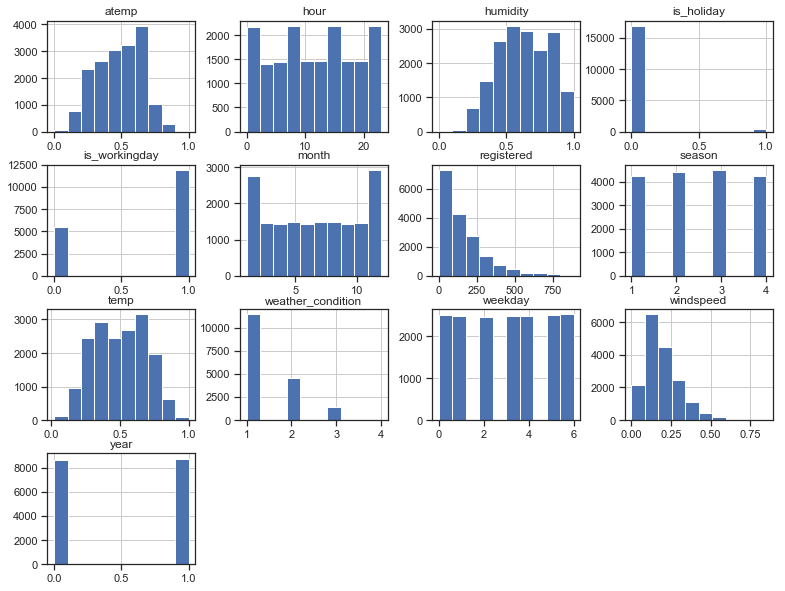

In [103]:
df.hist(figsize=(13,10))

## <font color='blue'>觀察下圖 temp 與 atemp 相關係數達0.99，因此選擇一個保留

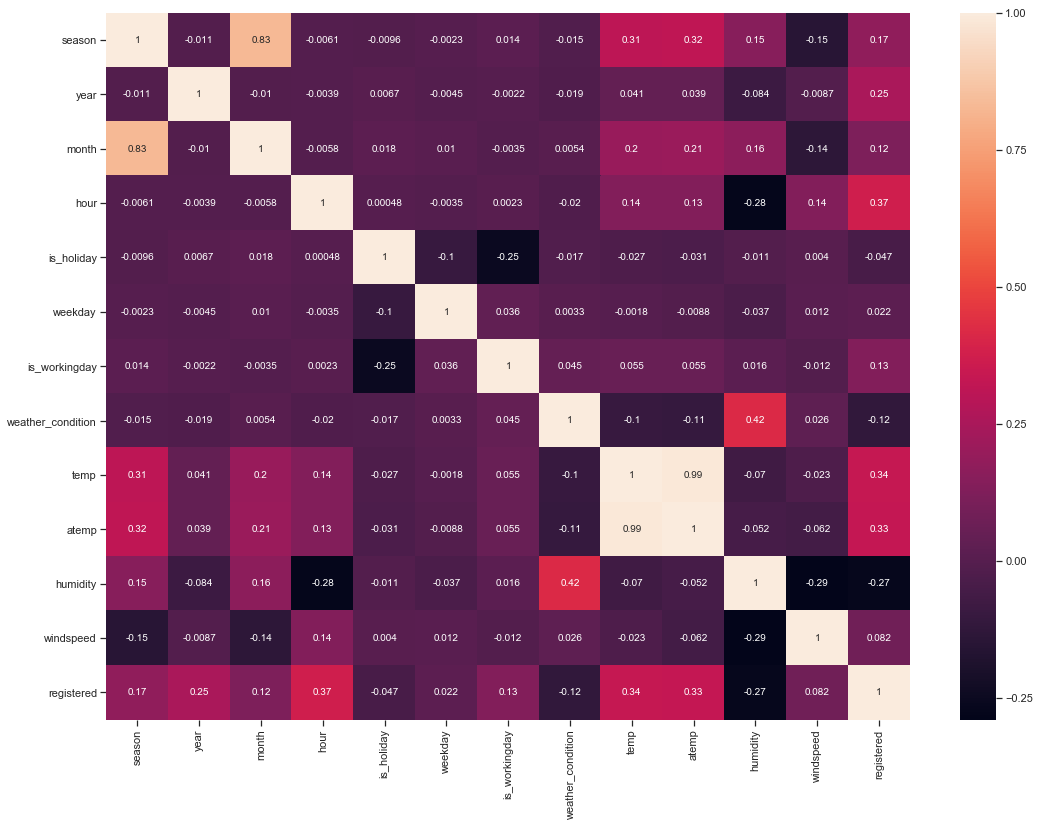

In [104]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(), annot=True)

In [105]:
del df['atemp']
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,windspeed,registered
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,13
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,32
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,27
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,10
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


## <font color='blue'>下圖 0: 2011, 1:2012 ，2012年註冊人數較多

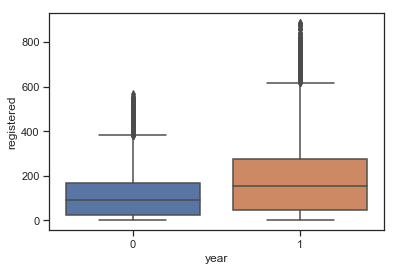

In [106]:
sns.boxplot(x="year", y="registered", data=df)
plt.show()

## <font color='blue'>下圖 1:springer, 2:summer, 3:fall, 4:winter，春天註冊人數較少

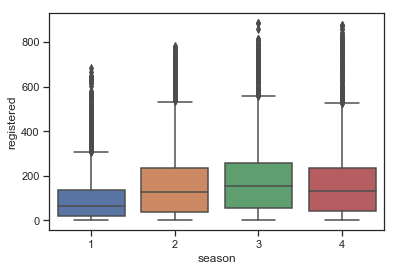

In [107]:
sns.boxplot(x="season", y="registered", data=df)
plt.show()

## <font color='blue'>下圖表示 1~12月，5~10月的註冊人數較多

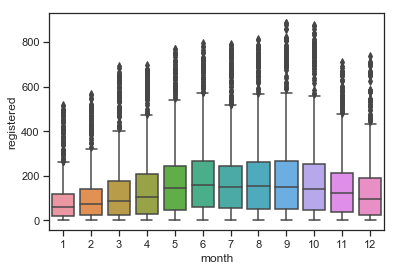

In [108]:
sns.boxplot(x="month", y="registered", data=df)
plt.show()

## <font color='blue'>5~10月屬於溫度較高的月份

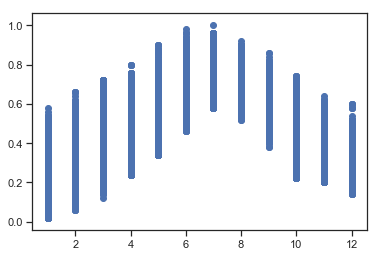

In [114]:
plt.scatter(x="month", y="temp", data=df)

## <font color='blue'>下圖 day of the week，星期六、日的註冊人數比其他少

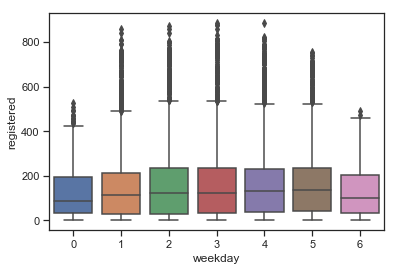

In [115]:
sns.boxplot(x="weekday", y="registered", data=df)
plt.show()

## <font color='blue'>下圖is_holiday 1假日 0非假日 is_workingday 1上班 0假日
## <font color='blue'>兩者都顯示非假日的註冊人數比平日多

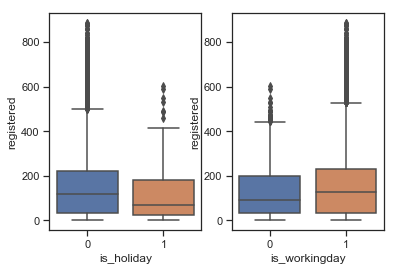

In [124]:
plt.subplot(121)
sns.boxplot(x="is_holiday", y="registered", data=df)
plt.subplot(122)
sns.boxplot(x="is_workingday", y="registered", data=df)
plt.show()

## <font color='blue'>下圖表示0~23時，7~8點與17~18點是註冊人數的高峰時段

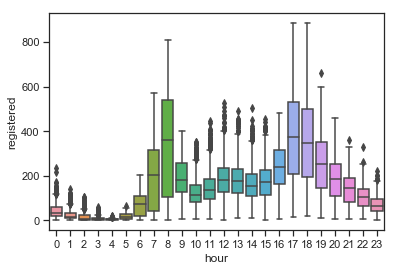

In [109]:
sns.boxplot(x="hour", y="registered", data=df)
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


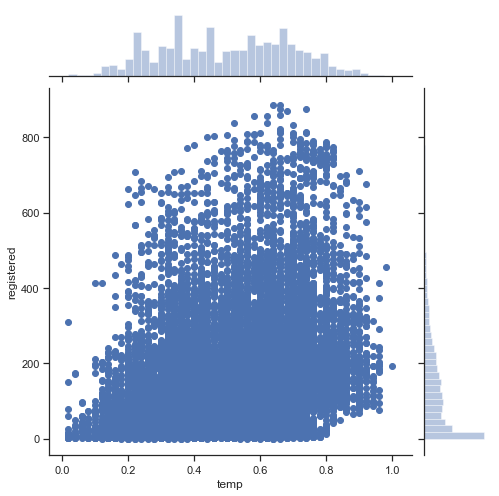

In [126]:
sns.jointplot('temp','registered',data=df,size=7)

In [135]:
x = df.iloc[:,:11]
y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=555)
train = X_train.join(y_train)
test = X_test.join(y_test)

In [139]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(X_train,y_train)
score = model.score(X_train,np.array(y_train))
print('traning_score=', score)

traning_score= 0.09103464150074807


In [140]:
predict_y_train = model.predict(X_train)
accuracy = metrics.accuracy_score(predict_y_train, np.array(y_train))
precision = metrics.precision_score(predict_y_train, np.array(y_train), average='weighted')
recall = metrics.recall_score(predict_y_train, np.array(y_train), average='weighted')
print('traning_accuracy_score =', accuracy )
print('traning_precision_score =', precision )
print('traning_recall_score =', recall )

traning_accuracy_score = 0.09103464150074807
traning_precision_score = 0.21730791401825902
traning_recall_score = 0.09103464150074807


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
